# Empirical verification of derived quantities - bootstrapping tests

In [1]:
import pickle
import os
from rulu.bootstrap_CI_test import *
from rulu.normal_normal_model import get_samples
from rulu.utils import get_test_params, find_all_tests_in_same_category
from matplotlib import pyplot as plt
from scipy.stats import percentileofscore
import time

/Users/bryan.liu/.local/share/virtualenvs/ranking_under_lower_uncertainty-NLm1LOk1/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/Users/bryan.liu/.local/share/virtualenvs/ranking_under_lower_uncertainty-NLm1LOk1/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [6]:
E_V_tests = find_all_tests_in_same_category(EVCITest(sigma_sq_1=0.5**2), 
                                            in_dir='./output/bootstrap_CI_tests/')
E_D_tests = find_all_tests_in_same_category(EDCITest(), 
                                            in_dir='./output/bootstrap_CI_tests/')
var_V_tests = find_all_tests_in_same_category(VarVCITest(sigma_sq_1=0.5**2), 
                                              in_dir='./output/bootstrap_CI_tests/')
cov_V1_V2_tests = find_all_tests_in_same_category(CovV1V2CITest(sigma_sq_1=0.5**2), 
                                                  in_dir='./output/bootstrap_CI_tests/')
var_D_tests = find_all_tests_in_same_category(VarDCITest(),
                                              in_dir='./output/bootstrap_CI_tests/')

# $\mathbb{E}(V)$

In [5]:
print_test_collection_result(E_V_tests)

E(V): 3991/4428 (90.13%) of the tests have the theoretical quantity within the CI.       


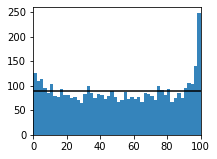

In [28]:
test_collection = E_V_tests
N_BINS=50

theoretical_quantity_percentiles = [
    test.theoretical_quantity_sample_percentile()
    for test in test_collection]

plt.figure(figsize=(3, 2.35))

plt.hist(theoretical_quantity_percentiles,
         bins=range(0, 100 + int(100 / N_BINS), int(100 / N_BINS)),
         alpha=0.9)
plt.axhline(len(test_collection) / N_BINS, c='black')
plt.xlim(0, 100)
# plt.show()
plt.savefig("./output/fig/E_V_validation.pdf",
            transparent=True, bbox_inches='tight')

# $\mathbb{E}(D)$

In [ ]:
print_test_collection_result(E_D_tests)

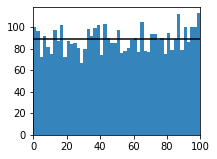

In [29]:
test_collection = E_D_tests
N_BINS=50

theoretical_quantity_percentiles = [
    test.theoretical_quantity_sample_percentile()
    for test in test_collection]

plt.figure(figsize=(3, 2.35))

plt.hist(theoretical_quantity_percentiles, 
         bins=range(0, 100 + int(100 / N_BINS), int(100 / N_BINS)),
         alpha=0.9)
plt.axhline(len(test_collection) / N_BINS, c='black')
plt.xlim(0, 100)
# plt.show()
plt.savefig("./output/fig/E_D_validation.pdf",
            transparent=True, bbox_inches='tight')

In [ ]:
print_test_collection_result([test for test in E_V_tests if test.M > 1])
print_test_collection_result([test for test in E_D_tests if test.M > 1])

# $\textrm{Var}(V)$

In [7]:
print_test_collection_result(var_V_tests)
# print_test_collection_result(cov_V1_V2_tests)

Var(V): 3390/4555 (74.42%) of the tests have the theoretical quantity within the CI.     


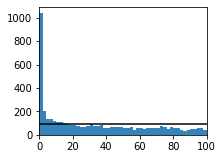

In [11]:
test_collection = var_V_tests
N_BINS=50

theoretical_quantity_percentiles = [
    test.theoretical_quantity_sample_percentile()
    for test in test_collection]

plt.figure(figsize=(3, 2.35))

plt.hist(theoretical_quantity_percentiles, 
         bins=range(0, 100 + int(100 / N_BINS), int(100 / N_BINS)),
         alpha=0.9)
plt.axhline(len(test_collection) / N_BINS, c='black')
plt.xlim(0, 100)
plt.show()
# plt.savefig("./output/fig/E_D_validation.pdf",
#             transparent=True, bbox_inches='tight')


In [10]:
for test in var_V_tests:
    if test.theoretical_quantity_below_sample_CI():
        print(test.N, test.M,  "    \t",
              np.round(test.sigma_sq_X, 3), 
              np.round(test.sigma_sq_1, 3), "\t",
              np.round(test.theoretical_quantity(), 3),
              np.round(test.sample_CI(), 4), "\t",
              np.round(test.theoretical_quantity() / test.sample_CI(), 3)
             )

15 4     	 39.39 28.66 	 6.664 [6.8366 7.2214] 	 [0.975 0.923]
10 1     	 42.527 20.915 	 21.355 [22.9739 24.3396] 	 [0.93  0.877]
16 4     	 47.453 8.415 	 6.135 [6.5421 6.9211] 	 [0.938 0.886]
29 16     	 37.816 59.536 	 2.06 [2.0787 2.1984] 	 [0.991 0.937]
11 6     	 69.106 33.347 	 8.484 [8.9008 9.4109] 	 [0.953 0.901]
185 125     	 13.433 87.421 	 0.104 [0.1048 0.1105] 	 [0.995 0.944]
23 16     	 46.124 17.363 	 2.35 [2.3508 2.4805] 	 [1.    0.947]
10 4     	 59.377 29.831 	 10.017 [10.679  11.2825] 	 [0.938 0.888]
41 6     	 16.849 0.958 	 1.147 [1.2196 1.289 ] 	 [0.94  0.889]
12 5     	 22.106 1.01 	 2.457 [2.6916 2.8391] 	 [0.913 0.865]
18 4     	 50.619 44.491 	 8.709 [8.923 9.449] 	 [0.976 0.922]
181 83     	 26.342 1.54 	 0.211 [0.2145 0.2266] 	 [0.986 0.933]
11 1     	 39.814 53.781 	 27.112 [28.2007 29.7528] 	 [0.961 0.911]
52 27     	 52.788 12.348 	 1.427 [1.4411 1.5257] 	 [0.991 0.936]
11 6     	 98.252 8.926 	 10.513 [11.5388 12.1739] 	 [0.911 0.864]
14 2     	 8.835 0

29 13     	 46.921 54.668 	 2.948 [2.9868 3.1533] 	 [0.987 0.935]
56 24     	 84.802 33.11 	 2.542 [2.5599 2.7013] 	 [0.993 0.941]
22 13     	 5.461 3.514 	 0.338 [0.3394 0.3582] 	 [0.997 0.945]
12 4     	 53.513 6.766 	 7.183 [7.9159 8.3474] 	 [0.907 0.86 ]
34 6     	 97.194 0.235 	 6.489 [6.903  7.2965] 	 [0.94  0.889]
10 7     	 1.508 4.605 	 0.199 [0.2001 0.2118] 	 [0.995 0.94 ]
13 7     	 10.342 14.39 	 1.241 [1.2538 1.3243] 	 [0.99  0.937]
33 9     	 74.325 25.146 	 5.065 [5.095  5.3754] 	 [0.994 0.942]
20 12     	 2.771 4.99 	 0.205 [0.2067 0.2184] 	 [0.99  0.937]
24 15     	 44.967 15.146 	 2.337 [2.4006 2.5426] 	 [0.974 0.919]
22 5     	 23.742 96.264 	 4.211 [4.2186 4.4571] 	 [0.998 0.945]
130 88     	 84.042 11.708 	 0.771 [0.771  0.8138] 	 [1.    0.947]
12 1     	 26.516 47.591 	 19.339 [19.9779 21.1122] 	 [0.968 0.916]
20 12     	 90.644 3.502 	 5.235 [5.5056 5.8287] 	 [0.951 0.898]
10 1     	 81.908 14.028 	 29.97 [35.2729 37.3574] 	 [0.85  0.802]
19 7     	 83.834 72.275

12 2     	 30.633 44.0 	 11.169 [11.3301 11.9632] 	 [0.986 0.934]
17 5     	 53.255 58.695 	 7.965 [8.0834 8.5249] 	 [0.985 0.934]
132 54     	 20.837 6.382 	 0.271 [0.2723 0.288 ] 	 [0.995 0.941]
20 8     	 23.354 94.642 	 2.662 [2.6641 2.8175] 	 [0.999 0.945]
14 2     	 5.649 0.123 	 0.956 [1.1112 1.1749] 	 [0.86  0.813]
259 145     	 25.243 11.418 	 0.14 [0.1398 0.1479] 	 [0.999 0.945]
22 13     	 92.517 14.311 	 5.148 [5.3819 5.682 ] 	 [0.957 0.906]
27 8     	 50.178 2.505 	 3.245 [3.5093 3.7023] 	 [0.925 0.877]
63 15     	 78.363 3.101 	 2.574 [2.6029 2.7474] 	 [0.989 0.937]
49 31     	 59.722 4.6 	 1.454 [1.4607 1.5475] 	 [0.995 0.939]
21 14     	 2.081 0.382 	 0.114 [0.1158 0.1225] 	 [0.984 0.93 ]
27 4     	 60.847 24.012 	 8.241 [8.495  8.9821] 	 [0.97  0.917]
102 5     	 25.02 10.804 	 2.432 [2.4434 2.5873] 	 [0.995 0.94 ]
44 29     	 41.458 8.929 	 1.134 [1.1368 1.2018] 	 [0.998 0.944]
26 14     	 70.428 19.448 	 3.675 [3.7698 3.9828] 	 [0.975 0.923]
125 39     	 14.203 6.634

12 6     	 42.646 22.129 	 5.181 [5.5114 5.8155] 	 [0.94  0.891]
14 6     	 36.868 72.362 	 5.218 [5.2738 5.5786] 	 [0.989 0.935]
88 13     	 80.899 0.835 	 2.505 [2.5806 2.7291] 	 [0.971 0.918]
24 5     	 80.137 32.435 	 9.357 [ 9.8079 10.3785] 	 [0.954 0.902]
13 2     	 19.76 17.319 	 6.361 [6.5652 6.9497] 	 [0.969 0.915]
40 25     	 8.446 4.155 	 0.276 [0.2795 0.2951] 	 [0.986 0.934]
18 8     	 2.572 0.475 	 0.207 [0.2156 0.2277] 	 [0.961 0.91 ]
27 1     	 50.78 23.26 	 22.654 [24.4906 25.8696] 	 [0.925 0.876]
22 2     	 35.84 32.157 	 11.132 [11.2607 11.9137] 	 [0.989 0.934]
378 5     	 65.832 0.253 	 2.559 [2.7521 2.917 ] 	 [0.93  0.877]
47 21     	 13.968 1.719 	 0.439 [0.4428 0.4678] 	 [0.991 0.938]
14 7     	 1.125 0.393 	 0.113 [0.118  0.1244] 	 [0.957 0.907]
129 4     	 16.523 1.077 	 1.138 [1.2361 1.3063] 	 [0.92  0.871]
104 2     	 15.533 2.844 	 2.406 [2.5834 2.7438] 	 [0.931 0.877]
33 17     	 97.963 29.252 	 4.213 [4.2553 4.4941] 	 [0.99  0.938]
16 8     	 12.312 6.274 	

19 6     	 60.743 13.587 	 5.922 [6.3134 6.6807] 	 [0.938 0.886]
36 17     	 70.419 17.982 	 2.91 [2.9123 3.0756] 	 [0.999 0.946]
351 172     	 59.903 7.719 	 0.247 [0.2481 0.2627] 	 [0.995 0.939]
16 5     	 7.327 1.401 	 0.826 [0.8912 0.9414] 	 [0.927 0.878]
27 13     	 38.533 6.599 	 2.007 [2.0612 2.1798] 	 [0.974 0.921]
53 11     	 40.134 0.757 	 1.651 [1.6918 1.7891] 	 [0.976 0.923]
25 9     	 44.885 27.663 	 3.559 [3.5773 3.7805] 	 [0.995 0.941]
50 39     	 84.132 24.522 	 1.866 [1.8749 1.987 ] 	 [0.995 0.939]
102 5     	 98.444 71.37 	 11.289 [11.3262 11.9876] 	 [0.997 0.942]
12 1     	 21.342 19.194 	 12.842 [13.5142 14.3044] 	 [0.95  0.898]
38 16     	 76.474 11.38 	 3.092 [3.0932 3.2634] 	 [1.    0.948]
75 9     	 80.976 30.956 	 4.845 [4.9017 5.1704] 	 [0.989 0.937]
55 1     	 38.234 26.482 	 19.241 [20.1037 21.1958] 	 [0.957 0.908]
71 41     	 57.483 11.962 	 1.066 [1.0709 1.1297] 	 [0.995 0.943]
45 20     	 28.173 0.336 	 0.873 [0.8741 0.9222] 	 [0.998 0.946]
11 6     	 22.

17 13     	 36.834 55.52 	 2.572 [2.5992 2.7425] 	 [0.99  0.938]
81 21     	 49.756 58.186 	 1.818 [1.8486 1.9567] 	 [0.983 0.929]
24 13     	 86.606 0.163 	 4.365 [4.524  4.7787] 	 [0.965 0.913]
10 7     	 8.876 16.484 	 1.131 [1.1492 1.216 ] 	 [0.984 0.93 ]
19 14     	 60.669 1.605 	 3.318 [3.459  3.6531] 	 [0.959 0.908]
14 8     	 89.049 0.197 	 7.16 [7.7448 8.1998] 	 [0.924 0.873]
22 7     	 52.33 40.146 	 5.365 [5.3891 5.6913] 	 [0.995 0.943]
74 21     	 90.928 16.344 	 2.541 [2.5537 2.6968] 	 [0.995 0.942]
33 20     	 84.382 66.063 	 3.526 [3.537  3.7451] 	 [0.997 0.942]
11 2     	 53.647 37.694 	 16.584 [17.3685 18.3448] 	 [0.955 0.904]
23 8     	 85.945 3.067 	 5.812 [6.1971 6.552 ] 	 [0.938 0.887]
15 8     	 37.873 5.535 	 3.18 [3.3694 3.5628] 	 [0.944 0.893]
14 1     	 79.092 26.658 	 33.696 [36.1838 38.2952] 	 [0.931 0.88 ]
144 2     	 64.019 8.213 	 8.454 [9.3382 9.8836] 	 [0.905 0.855]
11 5     	 33.065 0.167 	 3.676 [4.1405 4.3899] 	 [0.888 0.837]
76 5     	 50.689 75.881

39 16     	 71.833 21.746 	 3.07 [3.1314 3.3076] 	 [0.98  0.928]
269 31     	 31.675 44.417 	 0.757 [0.7621 0.8048] 	 [0.993 0.94 ]
645 15     	 70.442 0.316 	 1.127 [1.1614 1.2282] 	 [0.971 0.918]
19 9     	 81.484 53.153 	 6.863 [7.1885 7.5862] 	 [0.955 0.905]
13 1     	 16.591 41.914 	 13.005 [13.0106 13.73  ] 	 [1.    0.947]
10 1     	 48.281 17.711 	 22.046 [24.1665 25.5072] 	 [0.912 0.864]
32 1     	 21.479 1.297 	 4.942 [5.8443 6.2238] 	 [0.846 0.794]
82 22     	 28.464 0.31 	 0.657 [0.661  0.6985] 	 [0.994 0.941]
19 10     	 87.338 6.557 	 5.756 [6.0216 6.3704] 	 [0.956 0.903]
25 10     	 30.205 21.346 	 2.25 [2.3223 2.4546] 	 [0.969 0.917]
51 1     	 67.881 15.635 	 21.66 [23.8757 25.3031] 	 [0.907 0.856]
11 7     	 26.875 25.761 	 3.178 [3.2566 3.4359] 	 [0.976 0.925]
12 1     	 50.734 40.462 	 29.384 [30.3131 32.1649] 	 [0.969 0.914]
224 140     	 40.59 50.118 	 0.258 [0.2592 0.2734] 	 [0.995 0.943]
465 288     	 7.522 3.758 	 0.022 [0.0218 0.023 ] 	 [1.    0.947]
28 21     

14 5     	 61.533 56.68 	 9.136 [ 9.4607 10.0001] 	 [0.966 0.914]
32 12     	 61.073 91.174 	 4.185 [4.1857 4.425 ] 	 [1.    0.946]
64 1     	 5.365 10.765 	 3.854 [3.9169 4.1437] 	 [0.984 0.93 ]
253 110     	 28.399 14.886 	 0.196 [0.1973 0.208 ] 	 [0.994 0.943]
2328 461     	 6.281 40.651 	 0.013 [0.0128 0.0135] 	 [0.991 0.936]
406 128     	 23.821 3.06 	 0.112 [0.1131 0.1196] 	 [0.994 0.94 ]
684 258     	 50.835 9.878 	 0.131 [0.1309 0.1385] 	 [0.999 0.945]
19 7     	 24.38 14.233 	 2.449 [2.4651 2.6014] 	 [0.994 0.942]
21 9     	 13.546 2.903 	 0.98 [1.0089 1.0668] 	 [0.971 0.918]
33 26     	 62.123 95.759 	 2.217 [2.2185 2.348 ] 	 [0.999 0.944]
15 4     	 66.868 12.525 	 8.854 [ 9.6125 10.1712] 	 [0.921 0.87 ]
14 7     	 39.515 5.12 	 3.64 [3.911  4.1242] 	 [0.931 0.883]
40 8     	 23.049 2.486 	 1.391 [1.4695 1.5546] 	 [0.947 0.895]
45 8     	 23.173 47.32 	 2.335 [2.3418 2.4764] 	 [0.997 0.943]
19 8     	 23.661 5.791 	 1.926 [2.0273 2.1392] 	 [0.95 0.9 ]
23 16     	 18.821 47.5